For this lab, we will be using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder. Check out the files_for_lab/about.md to get more information if you are using the Online Excel.

Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

Dealing with the data
Show the dataframe shape.
Standardize header names.
Which columns are numerical?
Which columns are categorical?
Check and deal with NaN values.
Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
BONUS: Put all the previously mentioned data transformations into a function.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('C:/Users/mahna/Ironhack/Week1/Day2/Afternoon/lab4-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv')

Show the dataframe shape.

In [3]:
data.shape

(10910, 26)

Standardize header names.

In [4]:
display(data.head(3))

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


In [5]:
col_names= data.columns
col_names

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
data1= data.drop(['Unnamed: 0'],axis=1)

In [7]:
display(data1.head(3))

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A


In [8]:
data1 = data1.rename(columns={'EmploymentStatus':'Employment Status'})
data1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [9]:
data1.columns = data1.columns.str.lower()
data1.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Which columns are numerical?

In [10]:
data1.select_dtypes('number').columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

Which columns are categorical?

In [11]:
data1.select_dtypes('object').columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employment status', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [12]:
data1.select_dtypes('number','object').columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

Check and deal with NaN values.

In [13]:
len(data1[data1[:].isna()==True])

10910

#donors.isna().sum()
# pd.DataFrame()
#round(donors.isna().sum()/donors.shape[0],4)*100
#round(donors.isna().sum()/len(donors),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(donors.isna().sum()/len(donors),4)*100)
#display(nulls_df)
nulls_df = nulls_df.reset_index()
display(nulls_df)
nulls_df.columns = ['header_name', 'percent_nulls']
display(nulls_df.head())

In [14]:
data1.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employment status                   0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [15]:
round(data1.isna().sum()/len(data1),4)*100  #percent of missing values

customer                          0.00
state                             5.78
customer lifetime value           0.00
response                          5.78
coverage                          0.00
education                         0.00
effective to date                 0.00
employment status                 0.00
gender                            0.00
income                            0.00
location code                     0.00
marital status                    0.00
monthly premium auto              0.00
months since last claim           5.80
months since policy inception     0.00
number of open complaints         5.80
number of policies                0.00
policy type                       0.00
policy                            0.00
renew offer type                  0.00
sales channel                     0.00
total claim amount                0.00
vehicle class                     5.70
vehicle size                      5.70
vehicle type                     50.25
dtype: float64

In [16]:
nulls_df = pd.DataFrame(round(data1.isna().sum()/len(data1),4)*100)

In [17]:
display(nulls_df)

,0
customer,0.00
state,5.78
customer lifetime value,0.00
response,5.78
coverage,0.00
education,0.00
effective to date,0.00
employment status,0.00
gender,0.00
income,0.00


In [18]:
data1.dtypes

customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employment status                 object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size                      object
vehicle type    

In [19]:
data1['effective to date'] = pd.to_datetime(data1['effective to date'], errors='coerce')
data1.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employment status                        object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.
BONUS: Put all the previously mentioned data transformations into a function.

In [20]:
data1['effective to date'][0].month

2

In [21]:
def convert_date_format(m):
    return m.strftime(format='%B')

In [22]:
data1['month']=data1['effective to date'].apply(convert_date_format)

In [23]:
display(data1.head(10))

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January
5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2011-02-14,Employed,M,50549,...,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,February
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,NaN,February
7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,87197,...,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,NaN,February
8,FM55990,California,5989.773931,Yes,Premium,College,2011-01-19,Employed,M,66839,...,1,Personal Auto,Personal L1,Offer2,Branch,739.200000,Sports Car,Medsize,NaN,January
9,QX31376,Oregon,17114.328150,No,Extended,Master,2011-01-04,Employed,F,70961,...,2,Corporate Auto,Corporate L3,Offer2,Agent,408.000000,Four-Door Car,Small,NaN,January


In [24]:
data1['quarter'] = data1['effective to date'].dt.quarter

In [25]:
display(data1.tail())

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,quarter
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February,1
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February,1
10909,IV32877,NaN,6857.519928,NaN,Basic,Bachelor,2011-01-08,Unemployed,M,0,...,Personal Auto,Personal L1,Offer4,Web,1021.719397,SUV,Medsize,NaN,January,1


In [26]:
data2=data1.copy()

Show DataFrame info.

In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10279 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10279 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employment status              10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

Describe DataFrame.

In [28]:
data1.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,quarter
count,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000,10910.0
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.0
std,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556,0.0
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.0
25%,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527,1.0
50%,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630,1.0
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000,1.0
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.0


In [29]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
quarter,10910.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Show a plot of the total number of responses.

# Replacing null values for categorical variables
donors['gender'].unique()
donors['gender'].value_counts()

donors['gender'].value_counts(dropna=False)
#len(donors[donors['gender'].isna()==True])  # number of missing values
# use most common value to fillna
donors['gender'] = donors['gender'].fillna('F')
len(donors[donors['gender'].isna()==True]) # now this number is 0


In [30]:
data1['response'].unique()

array(['No', 'Yes', nan], dtype=object)

In [31]:
data1['response'].value_counts()

No     8813
Yes    1466
Name: response, dtype: int64

In [32]:
len(data1[data1['response'].isna()==True])

631

The response "No" is very high compared to "Yes". Therefore, most common value could be used to replace the missing values. Moreover, more people prefer to say nothing instead of "No".

In [33]:
data1['response_modified']=data1['response'].fillna('No')

In [34]:
len(data1[data1['response_modified'].isna()==True])

0

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

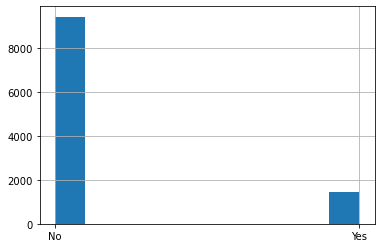

In [36]:
data1['response_modified'].hist()
plt.show()

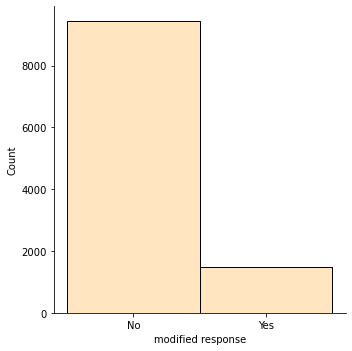

In [37]:
sns.displot(data1['response_modified'],color='NavajoWhite')
plt.xlabel("modified response")
plt.show()

Show a plot of the response rate by the sales channel.

In [38]:
sns.set_theme(style="whitegrid")

In [39]:
data1.columns.unique()

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type', 'month', 'quarter',
       'response_modified'],
      dtype='object')

In [40]:
display(data1)

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,quarter,response_modified
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February,1,No
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January,1,No
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,1,No
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,1,Yes
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,January,1,No
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,January,1,No
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,February,1,No
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,February,1,No


In [41]:
sales_response=data1[['sales channel','response_modified']]

In [42]:
display(sales_response)

,sales channel,response_modified
0,Agent,No
1,Call Center,No
2,Call Center,No
3,Branch,Yes
4,Branch,No
...,...,...
10905,Web,No
10906,Branch,No
10907,Web,No
10908,Branch,No


In [43]:
CrosstabResult=pd.crosstab(index=sales_response['response_modified'],columns=sales_response['sales channel'])
print(CrosstabResult)

sales channel      Agent  Branch  Call Center   Web
response_modified                                  
No                  3379    2696         1920  1449
Yes                  742     326          221   177


<AxesSubplot:xlabel='response_modified'>

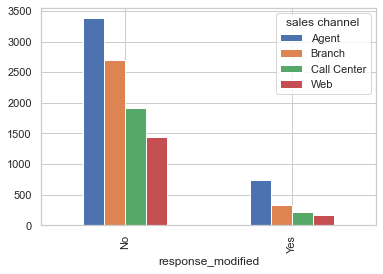

In [44]:
%matplotlib inline
CrosstabResult.plot.bar()

Show a plot of the response rate by the total claim amount.

In [45]:
data1.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employment status,gender,income,...,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,quarter,response_modified
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,February,1,No
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,January,1,No
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,February,1,No
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,January,1,Yes
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,January,1,No


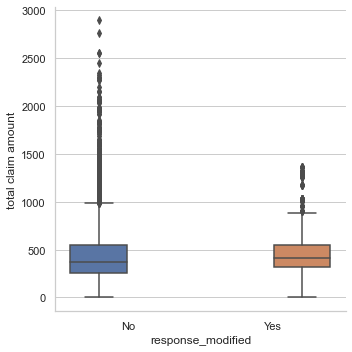

In [46]:
sns.catplot(x="response_modified", y="total claim amount", hue="response_modified", kind="box", data=data1)

Show a plot of the response rate by income.

In [48]:
income_response=data1[['income','response_modified']]

<AxesSubplot:title={'center':'income'}, xlabel='response_modified'>

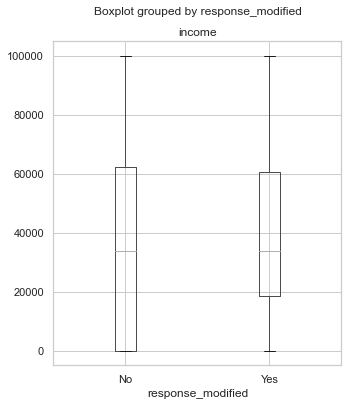

In [50]:
data1.boxplot(column='income', by='response_modified', figsize=(5,6))